[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Aperçu des données :
                                          Unnamed: 0 author statement target  \
0  0,D.L. Davis,End of eviction moratorium means ...    NaN       NaN    NaN   
1                                       ;;;;;;;;;;;;    NaN       NaN    NaN   
2  Inflation, Delta mismanagement, COVID for kids...    NaN       NaN    NaN   
3  1,D.L. Davis,End of eviction moratorium means ...    NaN       NaN    NaN   
4                                       ;;;;;;;;;;;;    NaN       NaN    NaN   

  BinaryNumTarget manual_keywords tweet 5_label_majority_answer  \
0             NaN             NaN   NaN                     NaN   
1             NaN             NaN   NaN                     NaN   
2             NaN             NaN   NaN                     NaN   
3             NaN             NaN   NaN                     NaN   
4             NaN             NaN   NaN                     NaN   

  3_label_majority_answer;;;;;;;;;;;;  
0                                 NaN  
1              

<ipython-input-29-b95b5bb3b156>:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frequency', y='word', data=df_word_freq, palette='viridis')


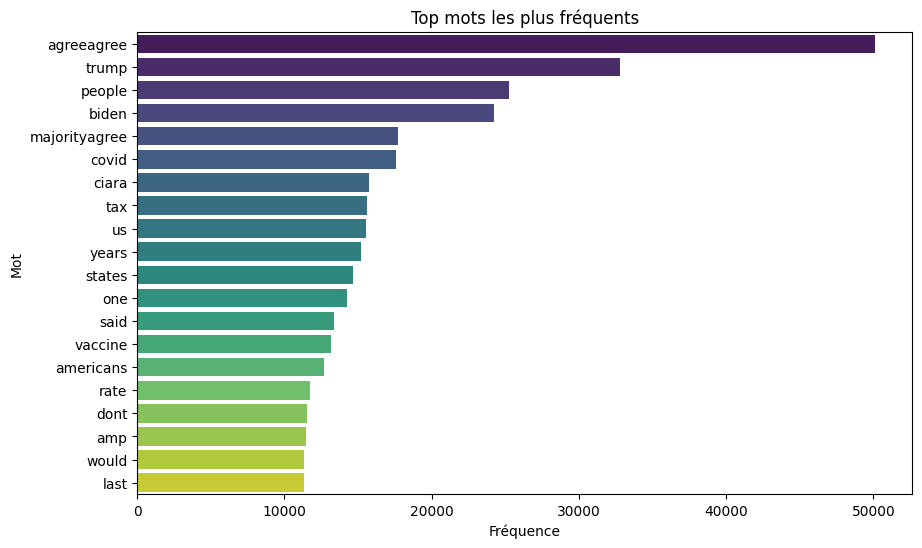

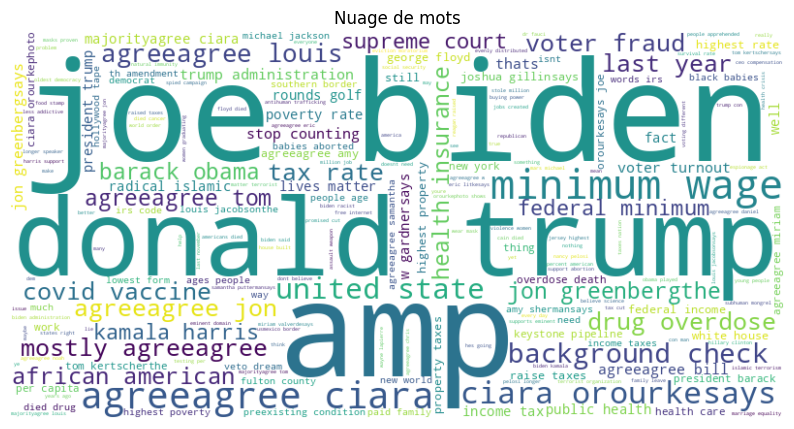

In [29]:
# Étape 1 : Charger les bibliothèques nécessaires
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re

# Télécharger les ressources NLTK nécessaires
nltk.download('punkt')
nltk.download('stopwords')

# Étape 2 : Charger les données
# Remplacez "twitter_eng.csv" par le fichier contenant vos données
df = pd.read_csv("twitter.csv", on_bad_lines='skip')

# Vérifiez un aperçu des données
print("Aperçu des données :")
print(df.head())

# Identifier la colonne contenant le texte brut
# Remplacez 'text' par le nom réel de la colonne contenant le texte,
# Par exemple, 'tweet_text' ou 'content'
# Vous pouvez inspecter df.columns pour trouver le nom correct
text_column = df.columns[0]  # Assuming the text column is the second column (index 1)
# or if you know column name:
# text_column = 'tweet_text' #example column name

# Remplir les valeurs NaN dans la colonne de texte avec des chaînes vides
df[text_column] = df[text_column].fillna("")

# Vérifiez les valeurs manquantes
print("\nValeurs manquantes dans les colonnes :")
print(df.isna().sum())

# Étape 3 : Nettoyage des données
def clean_text(text):
    text = str(text)  # Ensure text is a string
    text = re.sub(r"http\S+", "", text)  # Supprime les URL
    text = re.sub(r"@\w+", "", text)  # Supprime les mentions
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # Supprime les caractères spéciaux
    text = text.lower()  # Convertit le texte en minuscules
    return text

# Appliquer le nettoyage de texte
df['cleaned_text'] = df[text_column].apply(clean_text)

# Affichez un aperçu des données nettoyées
print("\nAperçu des données nettoyées :")
print(df[['cleaned_text']].head())

# Sauvegarder uniquement la colonne nettoyée dans un nouveau fichier CSV
output_file = "twitterDataClean.csv"  # Nom du fichier de sortie
cleaned_data = df[['cleaned_text']]  # Ne conserver que la colonne nettoyée
cleaned_data.to_csv(output_file, index=False)  # Sauvegarder sans l'index
print(f"\nLes données nettoyées ont été sauvegardées dans le fichier : {output_file}")

# Étape 4 : Tokenisation et suppression des stopwords
stop_words = set(stopwords.words("english"))  # Utilisez "french" pour les textes en français

def tokenize_and_remove_stopwords(text):
    words = word_tokenize(text)
    return [word for word in words if word not in stop_words and word.isalpha()] #add word.isalpha()

# Ajouter une colonne de tokens après suppression des stopwords
df['tokens'] = df['cleaned_text'].apply(tokenize_and_remove_stopwords)

# Étape 5 : Analyse des fréquences des mots
# Récupérer tous les mots sous forme de liste
all_words = [word for tokens in df['tokens'] for word in tokens]

# Compter les mots les plus fréquents
word_freq = Counter(all_words)
common_words = word_freq.most_common(20)

# Affichage des mots les plus fréquents sous forme de tableau
df_word_freq = pd.DataFrame(common_words, columns=['word', 'frequency'])

# Visualisation des mots les plus fréquents
plt.figure(figsize=(10, 6))
sns.barplot(x='frequency', y='word', data=df_word_freq, palette='viridis')
plt.title("Top mots les plus fréquents")
plt.xlabel("Fréquence")
plt.ylabel("Mot")
plt.show()

# Étape 6 : Générer un nuage de mots
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(all_words))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Nuage de mots")
plt.show()